## Решение в рамках subject

In [1]:
def dig_sep(i):
    return('{0:,.3f}'.format(i).replace(',', ' '))

def df_dig_sep(df):
    ndf = df.copy()
    for i in df.select_dtypes(include=['float']).columns.tolist():
        ndf[i] = ndf[i].apply(lambda x: '{0:,}'.format(round(x,4)).replace(',', ' '))
    for i in df.select_dtypes(include=['int']).columns.tolist():
        ndf[i] = ndf[i].apply(lambda x: '{0:,}'.format(x).replace(',', ' '))
    return (ndf)

### немножко истории

Regression - регресс/возвращение.

Статистическое использование слова "регрессия" исходит из явления, известного как регрессия к среднему, приписываемого сэру Френсису Гальтону (1889). Он показал, что, хотя высокие отцы имеют тенденцию иметь высоких сыновей, средний рост сыновей меньше, чем у их высоких отцов. Средний рост сыновей "регрессировал" и "двигался вспять" к среднему росту всех отцов в популяции. Таким образом, в среднем высокие отцы имеют более низких (но всё-таки высоких) сыновей, а низкие отцы имеют сыновей более высоких (но всё-таки довольно низких).

### немножко теории

Линейная регрессия (Linear regression) — модель зависимости переменной x от одной или нескольких других переменных (факторов, регрессоров, независимых переменных) с линейной функцией зависимости. Линейная регрессия относится к задаче определения «линии наилучшего соответствия» через набор точек данных и стала простым предшественником нелинейных методов, которые используют для обучения нейронных сетей.

Предположим, нам задан набор из 7 точек
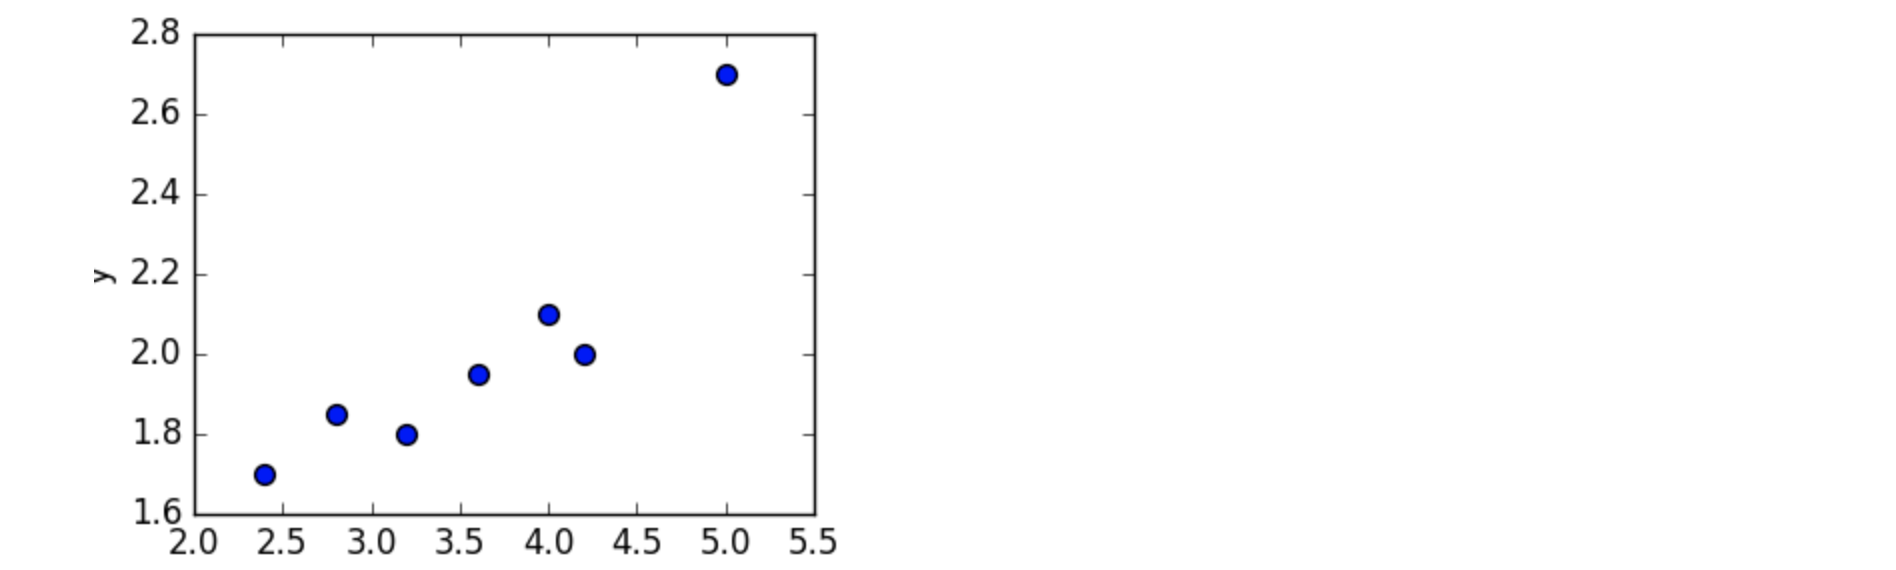

Цель линейной регрессии — поиск линии, которая наилучшим образом соответствует этим точкам. Напомним, что общее уравнение для прямой есть f (x) = m⋅x + b, где m — наклон линии, а b — его y-сдвиг. Таким образом, решение линейной регрессии определяет значения для m и b, так что f (x) приближается как можно ближе к y. Попробуем несколько случайных кандидатов:
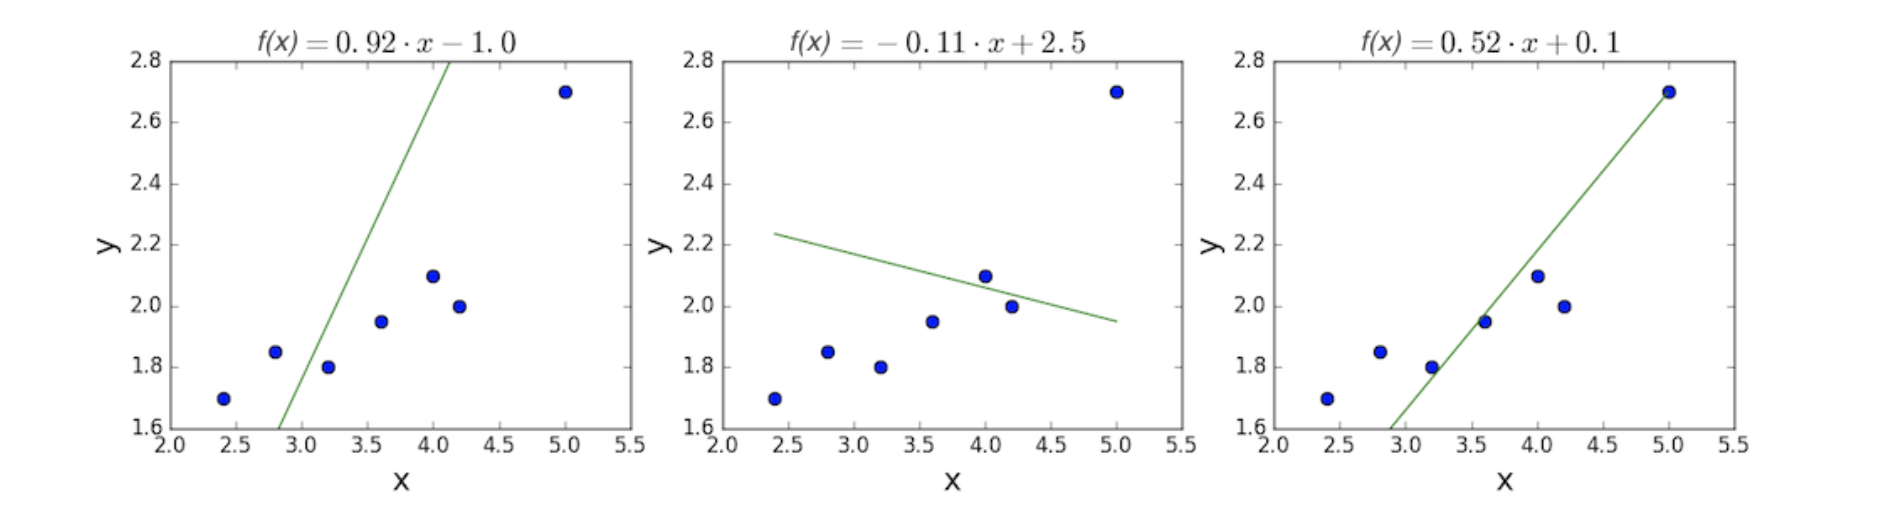

Довольно очевидно, что первые две линии не соответствуют нашим данным. Третья, похоже, лучше, чем две другие. Но как мы можем это проверить? Формально нам нужно выразить, насколько хорошо подходит линия, и мы можем это сделать, определив функцию потерь.

Функция потерь — это мера количества ошибок, которые наша линейная регрессия делает на наборе данных. Хотя есть разные функции потерь, все они вычисляют расстояние между предсказанным значением y_predict(х) и его фактическим значением y(x). Например, взяв строку из среднего примера выше, f(x)=−0.11⋅x+2.5, мы выделяем дистанцию ошибки между фактическими и прогнозируемыми значениями  красными пунктирными линиями:

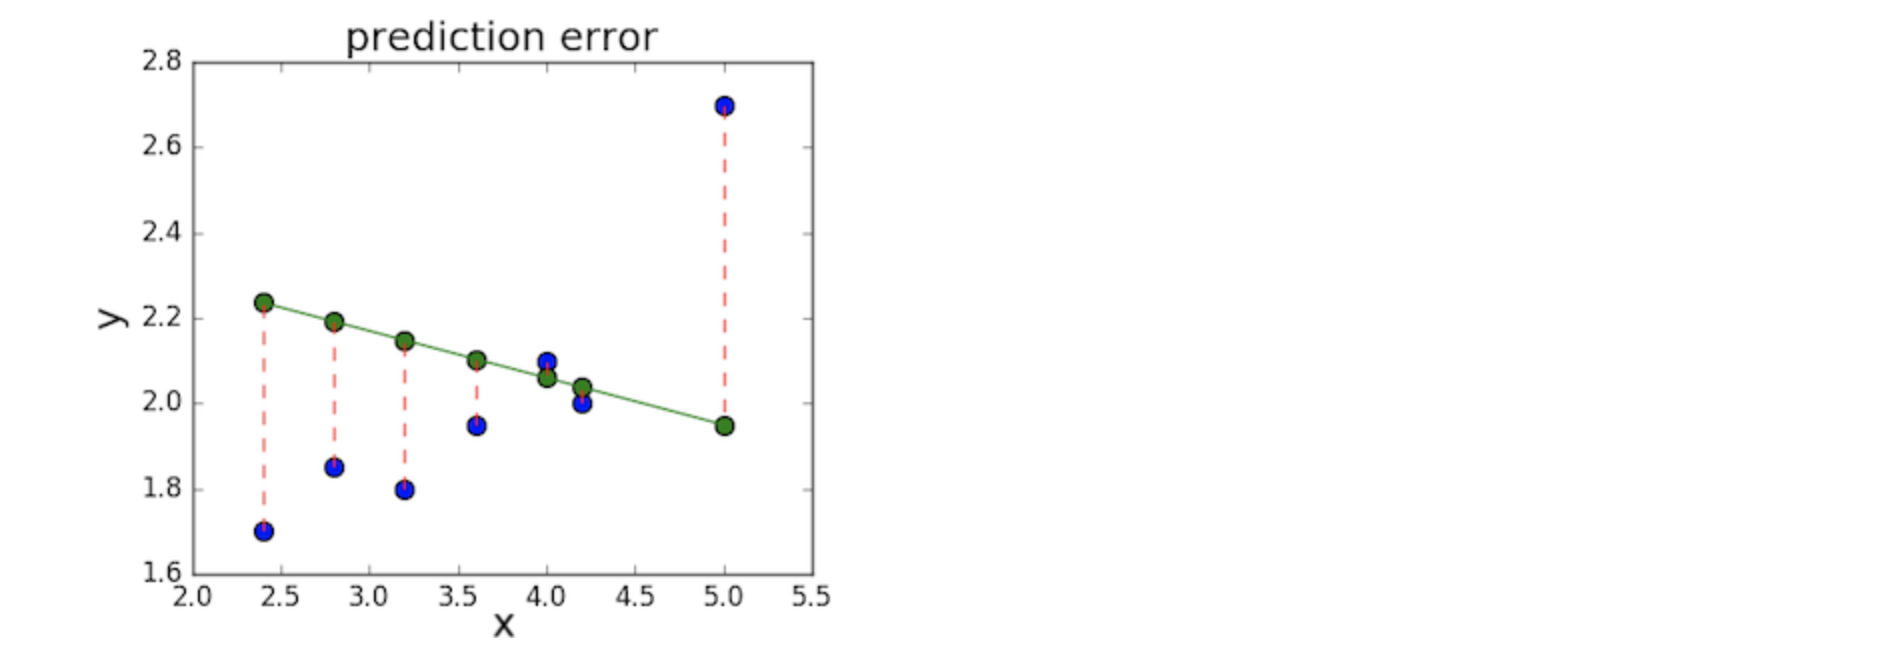

Одна очень распространенная функция потерь называется <b>средней квадратичной ошибкой (<red>MSE</red> - mean squared error)</b>. Чтобы вычислить MSE, мы просто берем все значения ошибок, считаем их квадраты длин и усредняем.

Вычислим <b>MSE</b> для каждой из трех функций выше: первая функция дает MSE 0,17, вторая — 0,08, а третья — 0,02. Неудивительно, что третья функция имеет самую низкую MSE, подтверждая нашу догадку, что это линия наилучшего соответствия.

Рассмотрим приведенный ниже рисунок, который использует две визуализации средней квадратичной ошибки в диапазоне, где наклон m находится между -2 и 4, а b между -6 и 8.

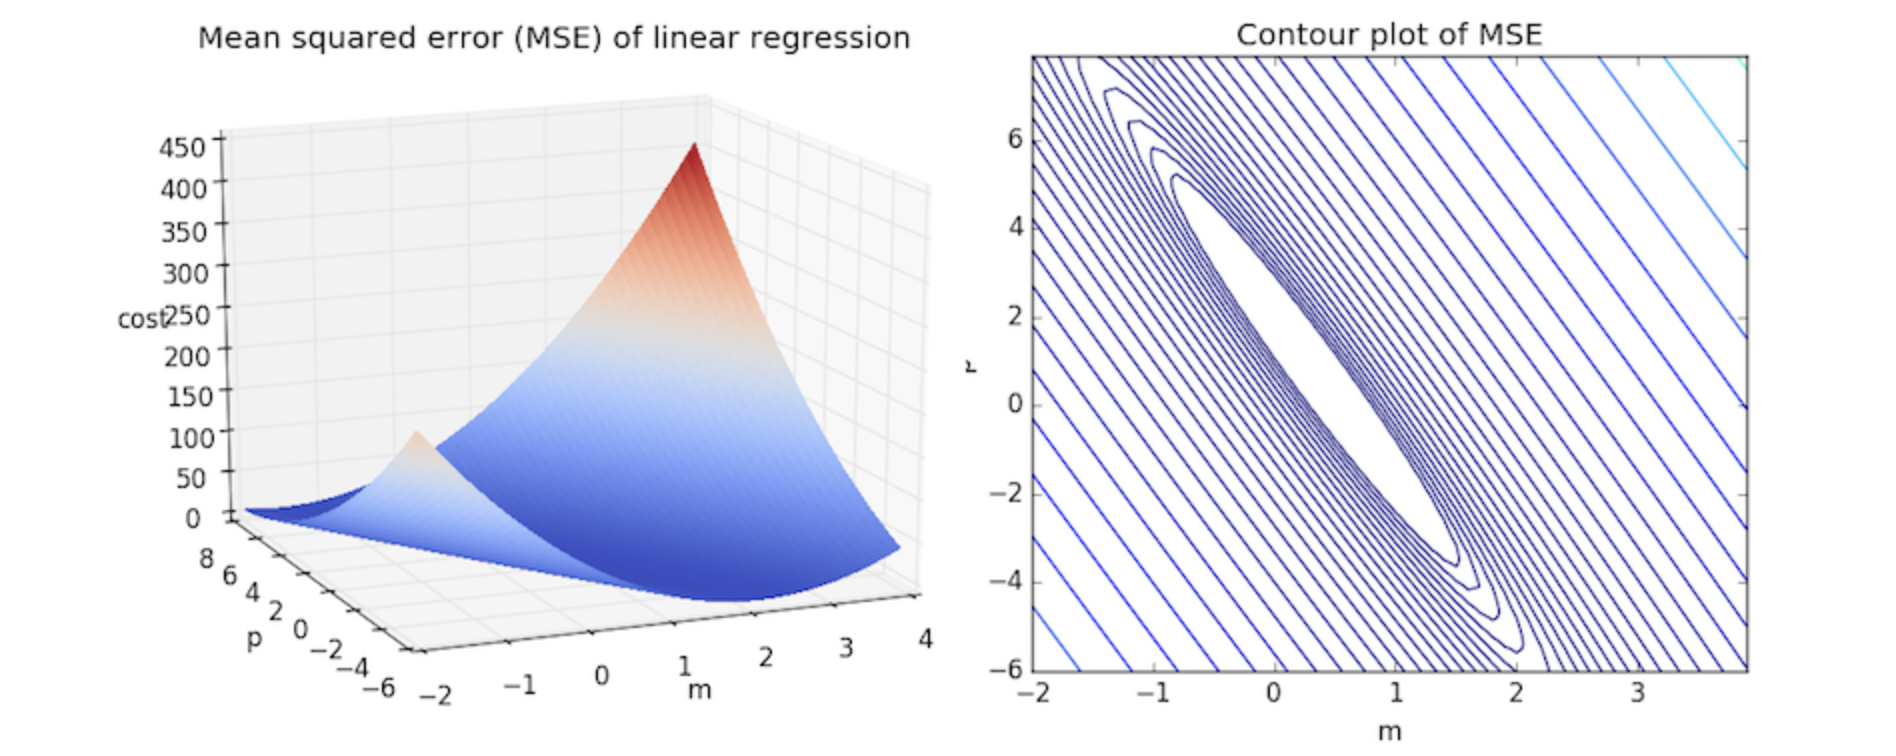

Слева: диаграмма, изображающая среднеквадратичную ошибку для -2≤m≤4, -6≤p≤8 Справа: тот же рисунок, но визуализирован как контурный график, где контурные линии являются логарифмически распределенными поперечными сечениями высоты.

Глядя на два графика, мы видим, что наш MSE имеет форму удлиненной чаши, которая, по-видимому, сглаживается в овале, грубо центрированном по окрестности (m, p) ≈ (0.5, 1.0). Если мы построим MSE линейной регрессии для другого датасета, то получим аналогичную форму. Поскольку мы пытаемся минимизировать MSE, наша цель — выяснить, где находится самая низкая точка в чаше.

Как рассчитать среднеквадратическую ошибку?
* Рассчитываем ошибку для каждого значения модели;
* Возводим ошибку в квадрат;
* Рассчитываем среднее по квадрату ошибки, т.е. среднеквадратическую ошибку MSE:

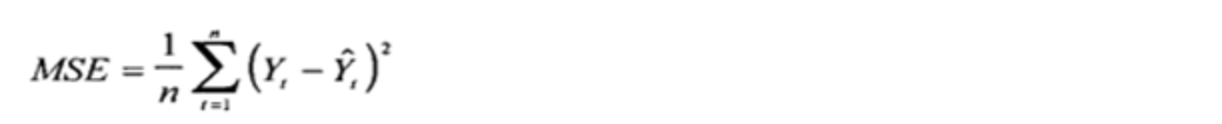

### конечно редко когда фактор бывает только один

Вышеприведенный пример очень простой, он имеет только одну независимую переменную x и два параметра m и b. Что происходит, когда имеется больше переменных? В общем случае, если есть n переменных, их линейная функция может быть записана как:

<b>f(x) = b+w_1*x_1 + … + w_n*x_n</b>

Один трюк, который применяют, чтобы упростить это — думать о нашем смещении «b», как о еще одном весе, который всегда умножается на «фиктивное» входное значение 1. Другими словами:

<b>f(x) = b*1+w_1*x_1 + … + w_n*x_n</b>

Добавление измерений, на первый взгляд, ужасное усложнение проблемы, но оказывается, постановка задачи остается в точности одинаковой в 2, 3 или в любом количестве измерений. Существует функция потерь, которая выглядит как чаша — гипер-чаша! И, как и прежде, наша цель — найти самую нижнюю часть этой чаши, объективно наименьшее значение, которое функция потерь может иметь в отношении выбора параметров и набора данных.

Итак, как мы вычисляем, где именно эта точка на дне? Распространенный подход — <b><span style="color:red">обычный метод наименьших квадратов</span></b>, который решает его аналитически. Когда есть только один или два параметра для решения, это может быть сделано вручную, и его обычно преподают во вводном курсе по статистике или линейной алгебре.

### что нас ждет дальше?

Обычный МНК не используют для оптимизации нейронных сетей. Причина, по которой линейную регрессию не используют, заключается в том, что нейронные сети нелинейны. Различие между линейными уравнениями, которые мы составили, и нейронной сетью — функция активации (например, сигмоида, tanh, ReLU или других).

Эта нелинейность означает, что параметры не действуют независимо друг от друга, влияя на форму функции потерь. Вместо того, чтобы иметь форму чаши, функция потерь нейронной сети более сложна. Она ухабиста и полна холмов и впадин. Свойство быть «чашеобразной» называется выпуклостью, и это ценное свойство в многопараметрической оптимизации. Выпуклая функция потерь гарантирует, что у нас есть глобальный минимум (нижняя часть чаши), и что все дороги под гору ведут к нему.

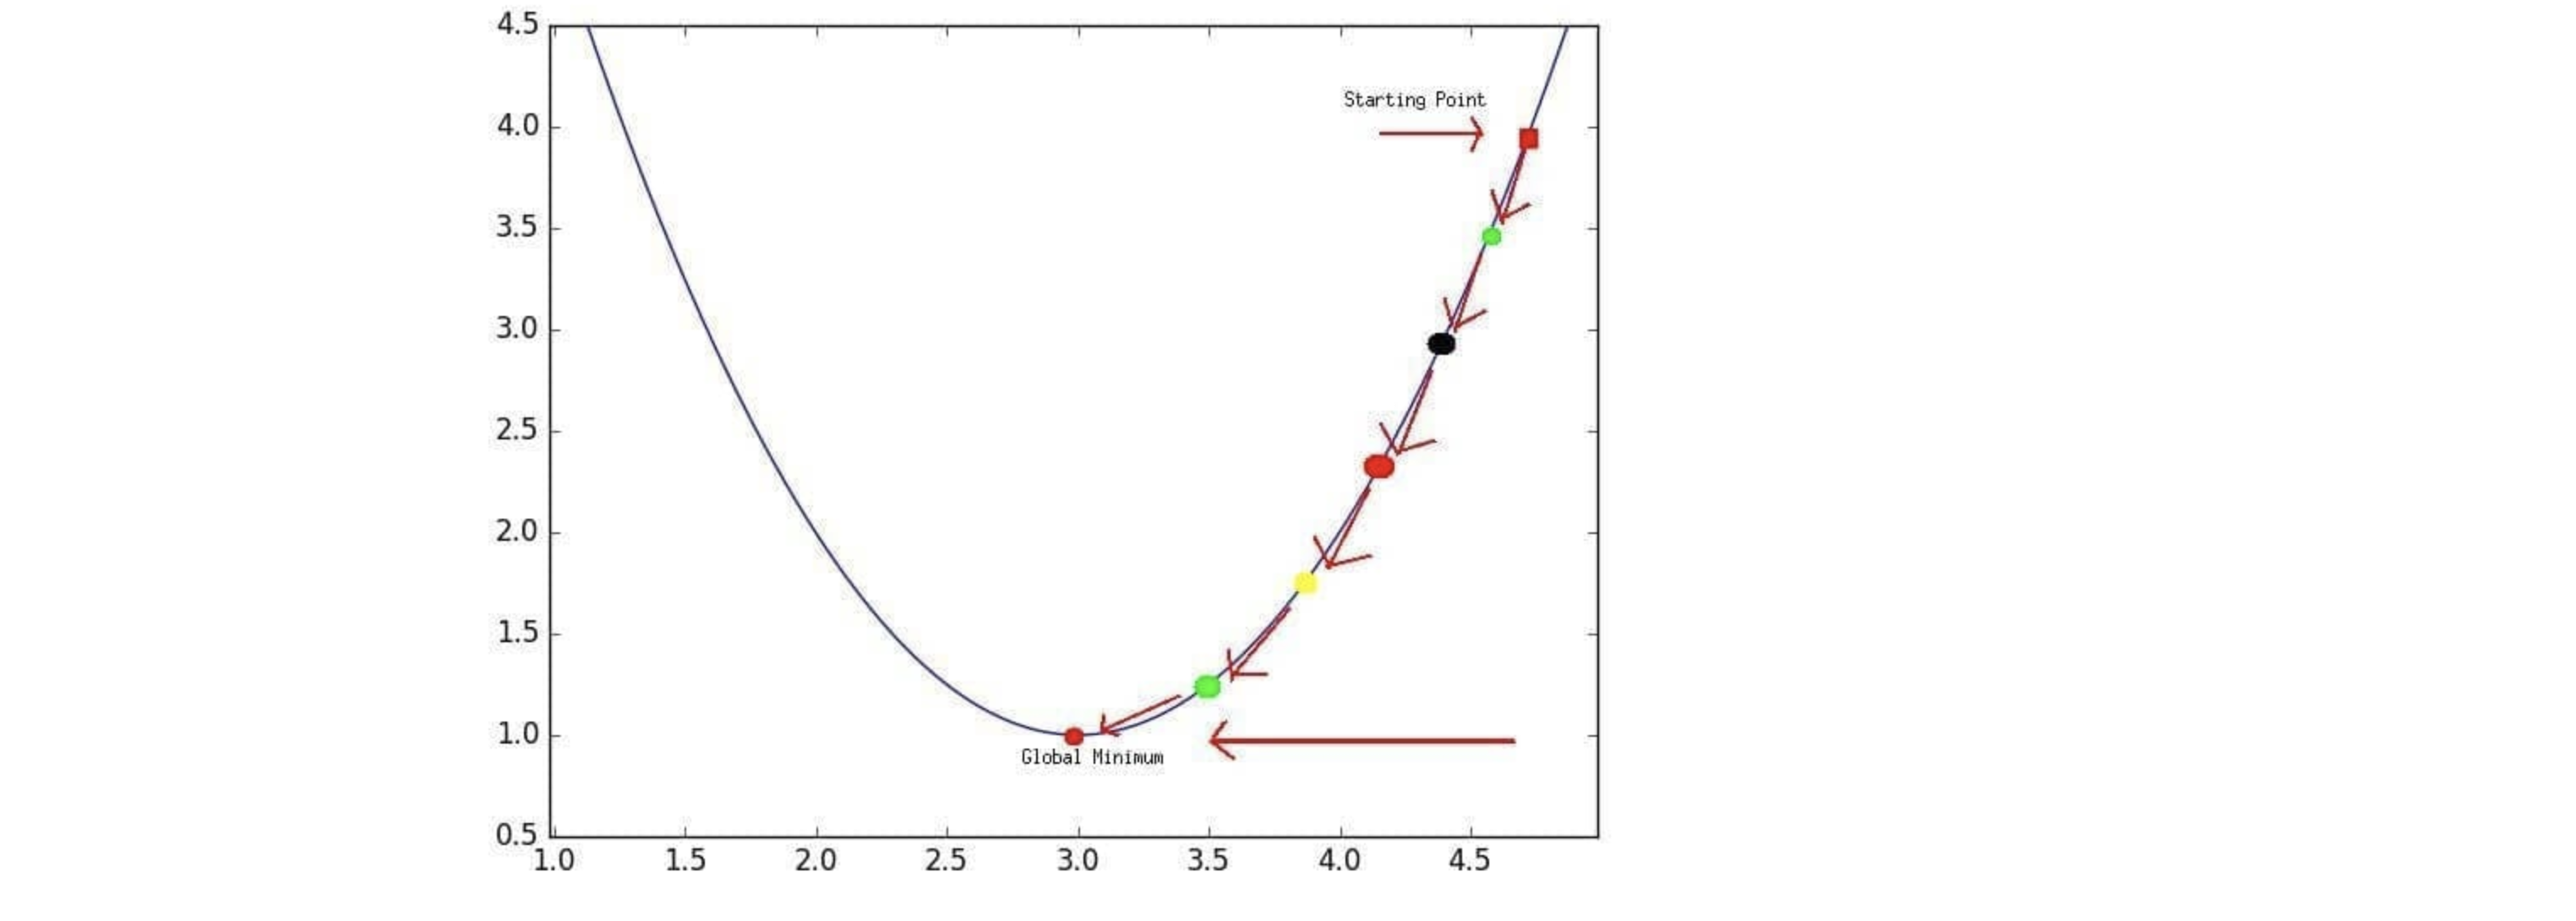

Но, вводя нелинейность, мы теряем это удобство ради того, чтобы дать нейронным сетям гораздо большую «гибкость» при моделировании произвольных функций. Цена, которую мы платим, заключается в том, что больше нет простого способа найти минимум за один шаг аналитически. В этом случае мы вынуждены использовать многошаговый численный метод, чтобы прийти к решению. Хотя существует несколько альтернативных подходов, градиентный спуск остается самым популярным методом.

### вернемся к линейной регрессии (МНК)

Метод наименьших квадратов (МНК, англ. <b>LS - Least Squares</b>) — математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. Он может использоваться для «решения» переопределенных систем уравнений (когда количество уравнений превышает количество неизвестных), для поиска решения в случае обычных (не переопределенных) нелинейных систем уравнений, для аппроксимации точечных значений некоторой функции. МНК является одним из базовых методов регрессионного анализа для оценки неизвестных параметров регрессионных моделей по выборочным данным.

Гауссу (1795) принадлежит первое применение метода, а Лежандр (1805) независимо открыл и опубликовал его под современным названием (фр. Méthode des moindres quarrés). Лаплас связал метод с теорией вероятностей, а американский математик Эдрейнruen (1808) рассмотрел его теоретико-вероятностные приложения. Метод распространён и усовершенствован дальнейшими изысканиями Энке, Бесселя, Ганзена и других.

### попробуем смоделировать уравнение регресии ничего не зная о других подходах

загрузим наши данные (используем пандас чтобы быстро считать csv)

In [2]:
import pandas as pd

df = pd.read_csv('data.csv')
df.head(2)

km  price
0  240000   3650
1  139800   3800

в X поместим значение фактора (регрессора), а в y - фактическое значение целевой переменной при этом регрессоре

In [3]:
df_dig_sep( df.sort_values('km') )

km  price
22   22 899  7 990
16   48 235  6 900
20   54 000  7 990
18   60 949  7 490
23   61 789  8 290
11   63 060  6 390
19   65 674  7 555
14   67 000  6 800
21   68 500  7 990
12   74 000  6 600
15   76 025  6 900
10   82 029  6 390
9    84 000  6 200
7    89 000  5 990
17   93 000  6 990
13   97 500  6 800
5   114 800  5 350
1   139 800  3 800
8   144 500  5 999
2   150 500  4 400
6   166 800  5 800
4   176 000  5 250
3   185 530  4 450
0   240 000  3 650

In [4]:
# посмотрим описательные статистики представленных данных
df_dig_sep( df.describe() )

km       price
count         24.0        24.0
mean    101 066.25  6 331.8333
std    52 674.2456  1 319.6542
min       22 899.0     3 650.0
25%       65 020.5     5 687.5
50%       83 014.5     6 495.0
75%      140 975.0     7 115.0
max      240 000.0     8 290.0

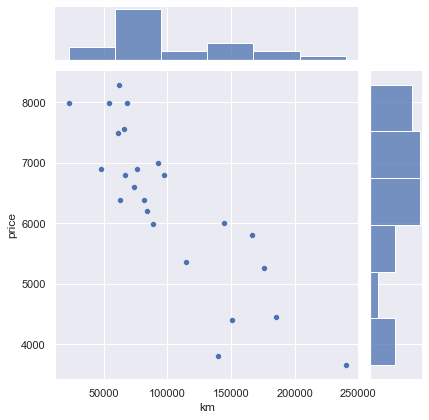

In [5]:
# посмотрим распределение данных (сделаем это с помощью красивой библиотеки seaborn)
import seaborn as sns

sns.set_theme(style="darkgrid")

# kind{ “scatter” | “kde” | “hist” | “hex” | “reg” | “resid” }
sns.jointplot(data=df, x="km", y="price", kind="scatter") #, truncate=False)

In [6]:
# получим массив из пандовской серии
X = df.km.values
y = df.price.values

[1.         0.53846366 0.58774948 0.74910295 0.70520633 0.42330989
 0.66282974 0.30447119 0.56011257 0.28144044 0.27236171 0.18498763
 0.23537893 0.34362347 0.20313587 0.24470638 0.11670144 0.3228958
 0.17526405 0.19702811 0.1432559  0.21004509 0.         0.17913321]


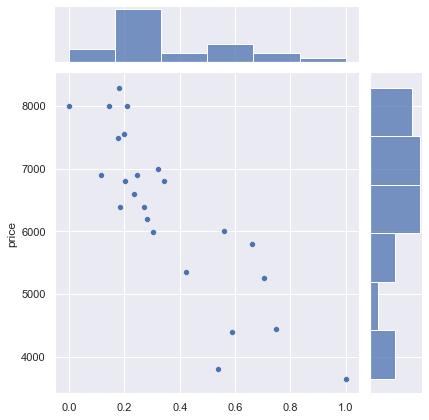

In [7]:
# нормализуем показатели
# нужно чтобы корректно выставить коэффициент и крутить линии регрессии относительно оси асцисс (чтобы не уползать в бесконечность)

X_norm = (X - X.min()) / (X.max() - X.min())

print(X_norm)

# посмотрим как распределение
sns.jointplot(x=X_norm, y=df.price, kind="scatter")

предположим что мы ничего не знаем о правильных коэфициентах и что сами коэффициенты - это нули - то есть функция ожидаемой цены всегди будет возвращать 0 на любых входных параметрах (то есть будет идти вдоль оси Х)

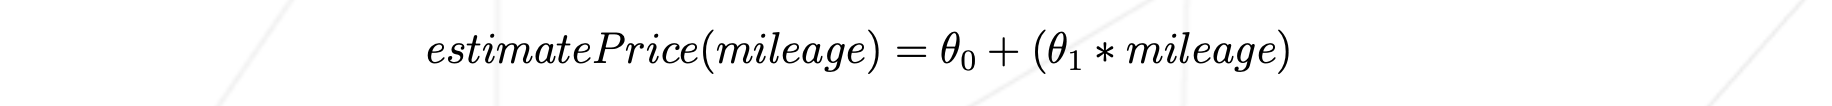

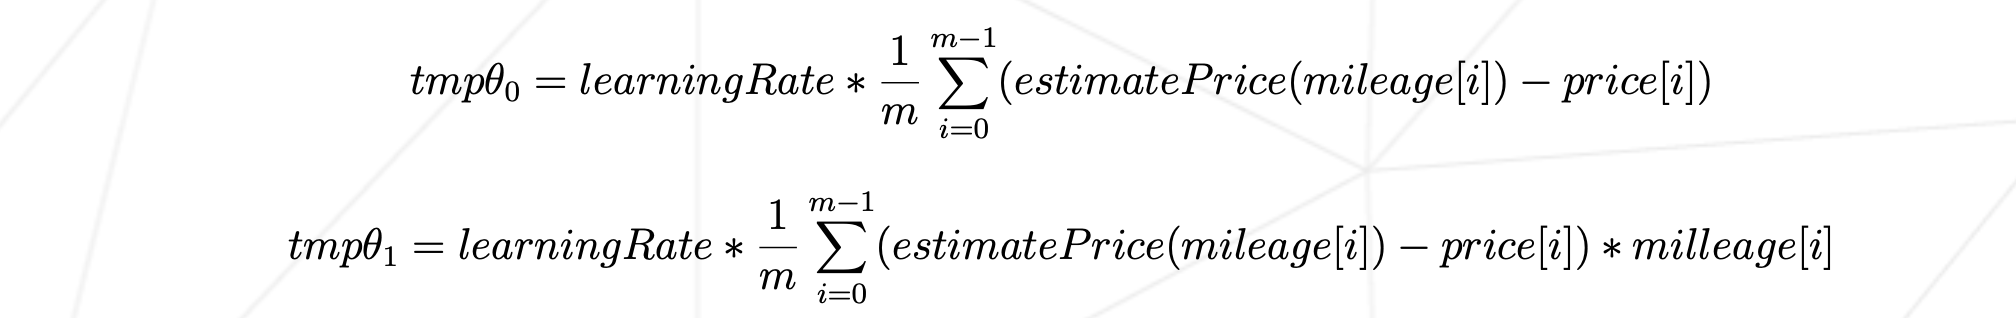

In [8]:
# посчитаем новые коэффициенты (сделаем один шаг - поднимем по оси ординат на learningRate и изменим угол наклона

# slope (в сабджекте -  θ_1 - тета_1) - угловой коэффициент (множитель регрессора, определяющий скорость роста 
#                                                        целевой переменной относительно регрессора)
# она представляет собой величину, на которую Y увеличивается в среднем, если мы увеличиваем x на одну единицу.
#
# intercept (в сабджекте - θ_0 - тета_0) - интерсепт - точка пересечения оси абцисс

slope_normalize, intercept = 0.0, 0.0

for _ in range(20000):
    # tetha1 - угол наколона линии регресии
    slope_normalize -= 0.01 * sum(
        (estimate_price - fact_price) * milleage
            for (milleage, estimate_price, fact_price) in zip(X_norm, intercept + slope_normalize*X_norm, y)
    ) / len(X_norm)

    # tetha0 - смещение линии регрессии
    intercept -= 0.01 * sum(
        (estimate_price - fact_price)
            for (milleage, estimate_price, fact_price) in zip(X_norm, intercept + slope_normalize*X_norm, y)
    ) / len(X_norm)

print ("slope_normalize:", dig_sep(slope_normalize))
print ("intercept", dig_sep(intercept))

slope_normalize: -4 656.268
intercept 8 008.317


In [9]:
# слоуп денормализованный (чтобы можно было просто подставлять в уравнение регрессии)
slope = slope_normalize/df.km.max()

slope

-0.019401116755250192

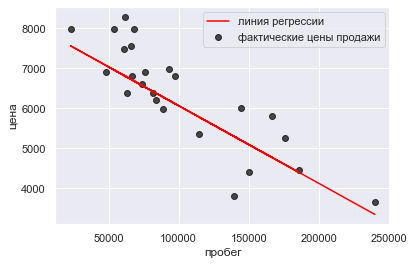

In [10]:
# Построим на графиках получившуюся линю регрессии

import matplotlib.pyplot as plt

plt.scatter(X, y, color='black', alpha=0.7, label='фактические цены продажи')
plt.plot(X, [ estimate_price for estimate_price in intercept+slope*X ], color='red', label='линия регрессии')
plt.xlabel("пробег")
plt.ylabel("цена")
plt.legend(loc='upper right')
plt.show()

In [11]:
# добавим в нашу таблицу спрогнозированные значения и разницу между фактической ценой и предсказанной

df_res = df.copy()
df_res['estimate_price'] = [estimate_price for estimate_price in (intercept + slope*X)]
df_res['estimate_price'] = df_res.estimate_price.apply(int)
df_res['diff'] = df_res.estimate_price - df_res.price
df_res['square_error'] = [i**2 for i in df_res['diff']]

df_dig_sep(df_res)

km  price estimate_price    diff square_error
0   240 000  3 650          3 352    -298       88 804
1   139 800  3 800          5 296   1 496    2 238 016
2   150 500  4 400          5 088     688      473 344
3   185 530  4 450          4 408     -42        1 764
4   176 000  5 250          4 593    -657      431 649
5   114 800  5 350          5 781     431      185 761
6   166 800  5 800          4 772  -1 028    1 056 784
7    89 000  5 990          6 281     291       84 681
8   144 500  5 999          5 204    -795      632 025
9    84 000  6 200          6 378     178       31 684
10   82 029  6 390          6 416      26          676
11   63 060  6 390          6 784     394      155 236
12   74 000  6 600          6 572     -28          784
13   97 500  6 800          6 116    -684      467 856
14   67 000  6 800          6 708     -92        8 464
15   76 025  6 900          6 533    -367      134 689
16   48 235  6 900          7 072     172       29 584
17   93 000  6 990          6 204    -786      617 796
18   60 949  7 490          6 825    -665      442 225
19   65 674  7 555          6 734    -821      674 041
20   54 000  7 990          6 960  -1 030    1 060 900
21   68 500  7 990          6 679  -1 311    1 718 721
22   22 899  7 990          7 564    -426      181 476
23   61 789  8 290          6 809  -1 481    2 193 361

In [12]:
# посчитаем MSE (mean square error )
dig_sep( df_res.square_error.sum() / len(df_res) )

'537 930.042'

### Расчитаем коэффициент детерминации нашей модели (ее объяснительную силу):

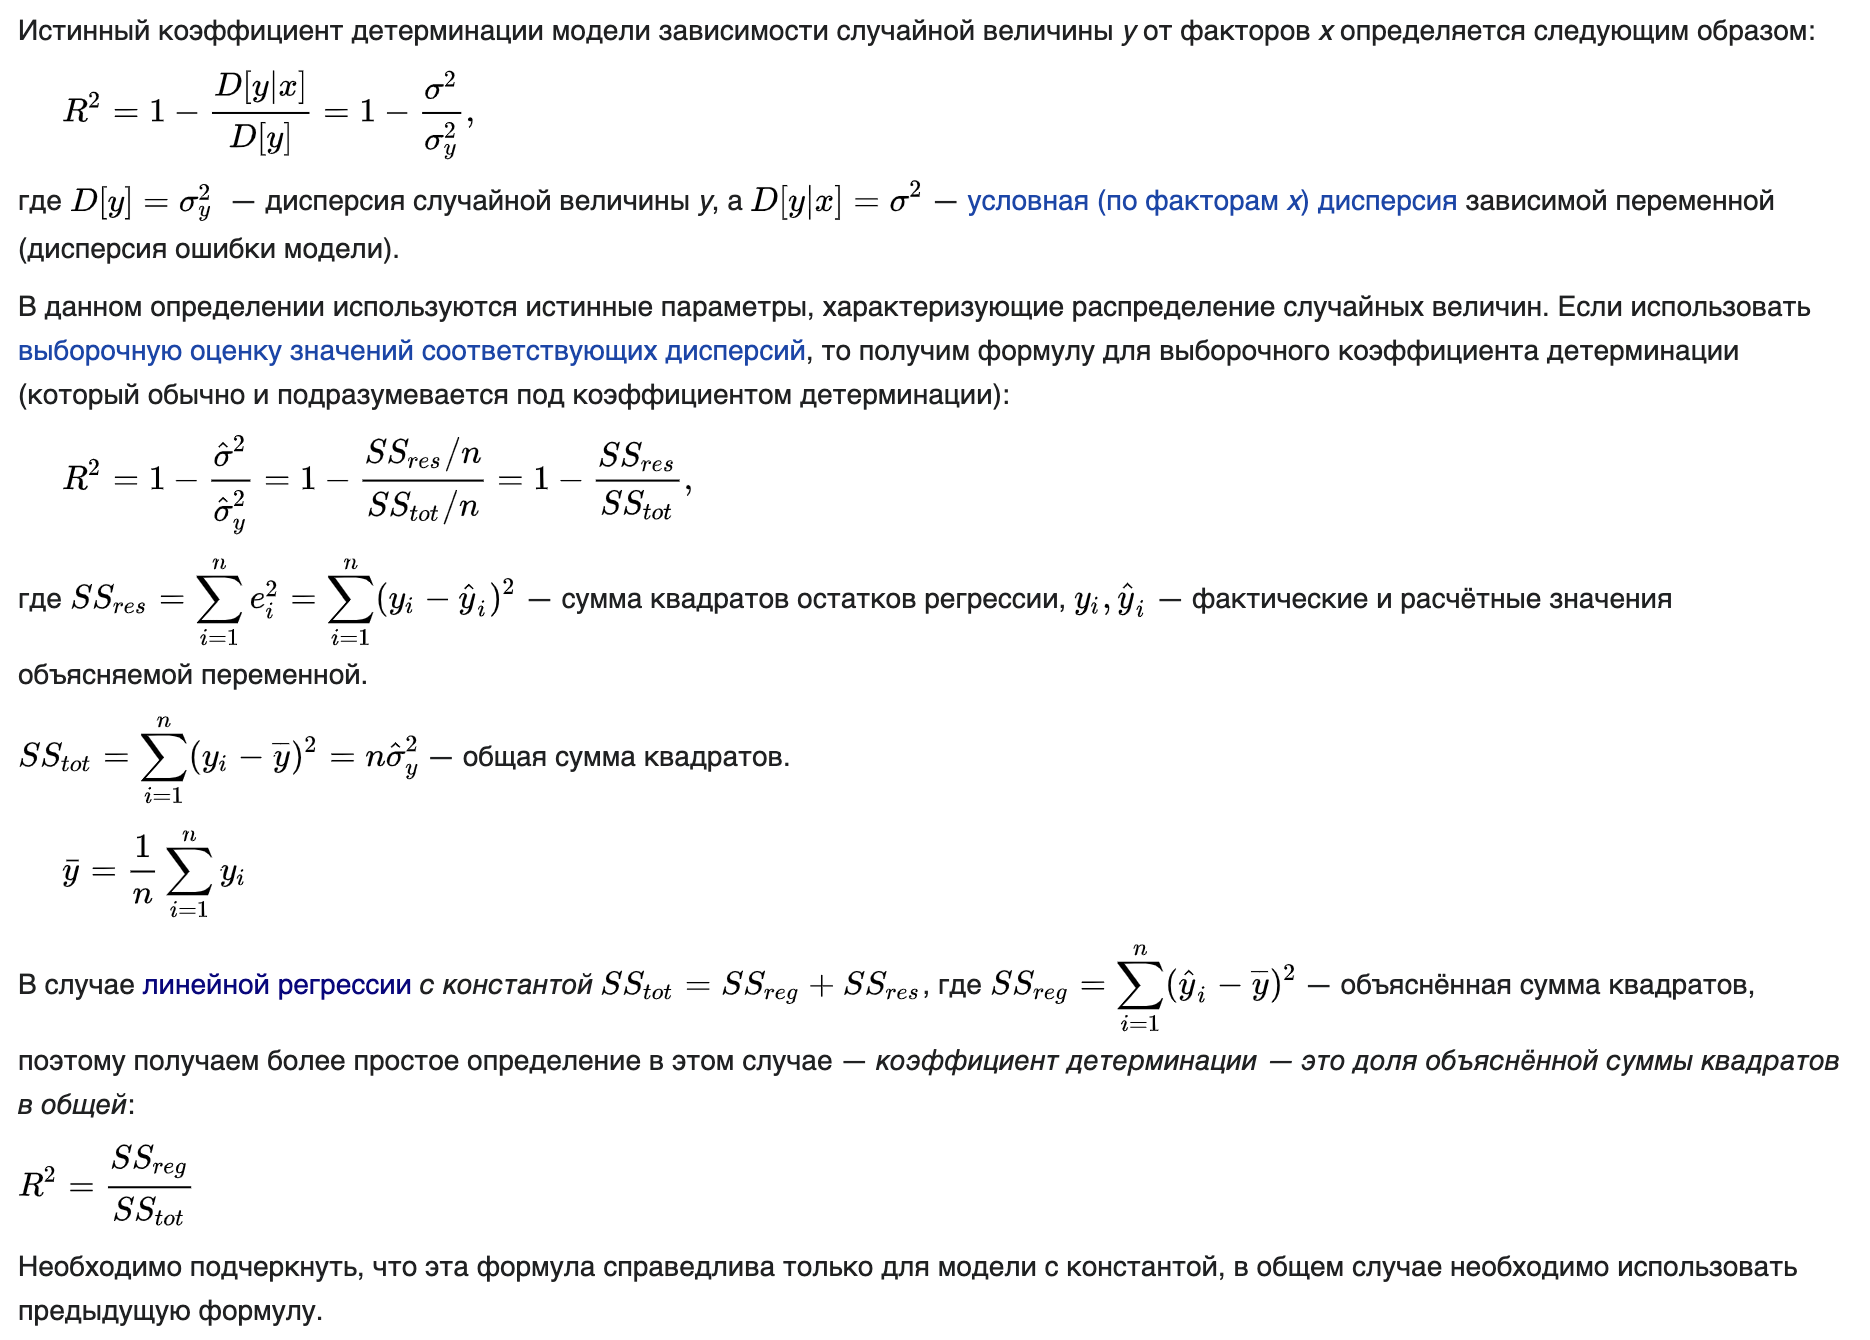

Коэффициент детерминации для модели с константой принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % (в этом случае коэффициент множественной корреляции превышает по модулю 70 %). Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими (коэффициент корреляции превышает 90 %). Значение коэффициента детерминации 1 означает функциональную зависимость между переменными.

In [13]:
# SS_res - сумма квадратов остатков регрессии — фактические и расчётные значения объясняемой переменной.

# посчитаем расчетные значнеия объясняемой переменной (цену продажи)
y_predict_arr = intercept + slope * X

# посчитаем сумму квадратов остатков регресси
SS_res = sum( (y_predict_arr - y)**2 ) / len(y)

# sum_of_square_res (сумма квадратов остатков регрессии):
dig_sep(SS_res)

'537 630.605'

In [14]:
# SS_tor - общая сумма квадратов (квадраты отклонений объясняемой переменной от среднего значения)
SS_tot = sum( (y - y.mean()) ** 2 ) / len(y)

# sum_of_square_total
dig_sep(SS_tot)

'1 668 925.222'

### Коэффициент детерминации нашей модели:

In [15]:
1 - SS_res/SS_tot

0.6778581819776157

то есть наша модель объясняет 67 процентов наблюдаемой дисперсии целевой перменной. Больше 50 - это хорошо, но и говорт о том, что регрессор и целевая перменная функционально независимы. 

In [16]:
# посчитаем объясненную сумму квадратов регрессии
SS_reg = sum( (y_predict_arr - y.mean())**2 ) / len(y)

dig_sep(SS_reg)

'1 081 679.223'

In [17]:
# или то же самое через объясненную сумму квадратов регрессии
SS_reg/SS_tot

0.6481292322381071

### Посморим p-value 

При построении линейной регрессии проверяется нулевая гипотеза о том, что генеральный угловой коэффициент линии регрессии slope равен нулю.

Если угловой коэффициент линии равен нулю, между X и y нет линейного соотношения: изменение X не влияет на y.

Для тестирования нулевой гипотезы о том, что истинный угловой коэффициент slope равен нулю можно воспользоваться следующим алгоритмом:

Вычислить статистику критерия, равную отношению b/SE(b), которая подчиняется t-распределению с (n-2) степенями свободы, где SE(b) стандартная ошибка коэффициента b.

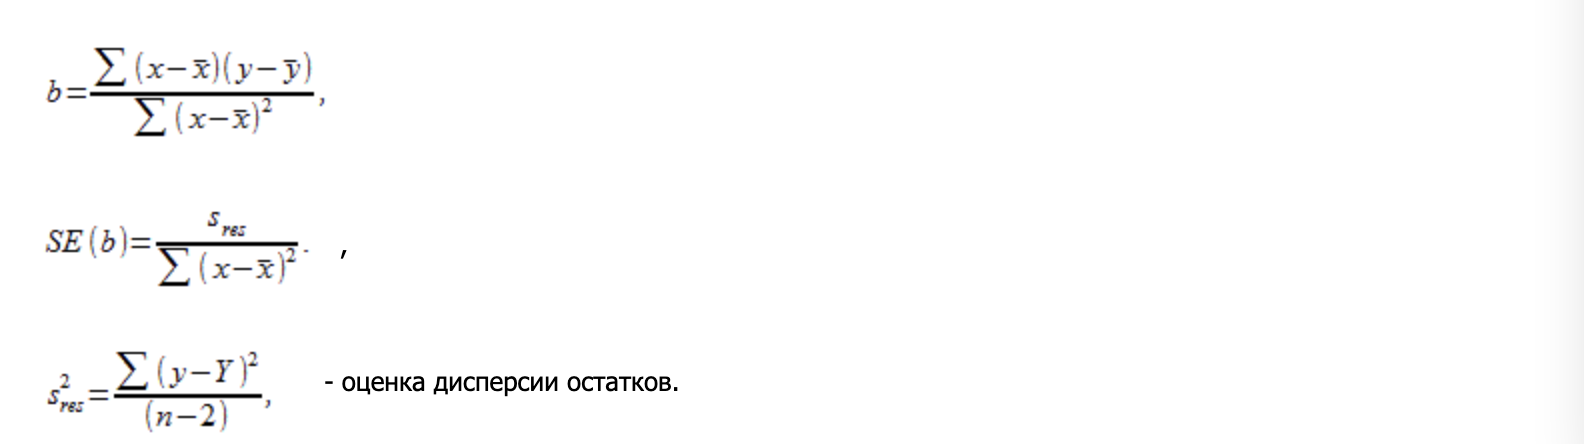

In [18]:
b = sum( (X - X.mean()) * (y - y.mean()) ) / sum( (X - X.mean())**2 )
b

-0.0214489635917023

In [19]:
# найдем дисперсию остатков
y_predict_arr = intercept + slope * X

S_sqrt_res = sum( (y - y_predict_arr)**2 ) / (len(y) - 2)

dig_sep(S_sqrt_res)

'586 506.115'

In [20]:
# найдем стандартную ошибку:

import math

SE_b = math.sqrt(S_sqrt_res) / sum( (X - X.mean())**2 )

SE_b

1.2000843916660888e-08

In [21]:
# вычислим статистику критерия (которая подчиняется  t-распределению)
b/SE_b

-1787287.939136055

In [22]:
# посчитаем p-value

# достанем t распределение
from scipy.stats import t

# вызовем функцию кумулятивного распределения t-распределения при заданном значении статистики
# вероятность того, что случайная выборка X будет меньше или равна x
t.cdf(-1787287.939136055, len(y) - 2)

1.390385409772167e-124

Обычно если достигнутый уровень значимости p-val < 0.05 нулевая гипотеза отклоняется. То есть получить такое распределение показателей случайно - меньшее 5 процентов.

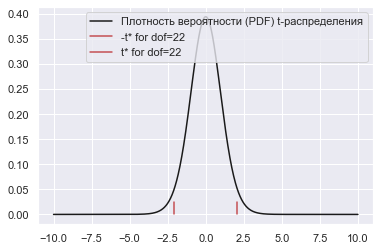

In [23]:
# на всякий случай нарисуем t-распределение при нашем количестве степеней свободы

## Basic T-Distribution
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

## Setup      
dof = len(y)-2  # кол-во степеней свободы
alpha = 0.05    # наш уровень значимости
ntails = 2      # сколько хвостов показываем 

## Найдем крайние значения статистики при заданном уровне значимости
tcrit = abs(t.ppf(alpha/ntails, dof))

plt.figure()
xs = np.linspace(-10,10,1000)

# (Probability density function)
plt.plot(xs, t.pdf(xs, dof), 'k', label="Плотность вероятности (PDF) t-распределения")

critline = np.linspace(0, alpha/ntails)  # y range for critical line, AKA probability from 0-p*
xs_1 = len(critline) * [-tcrit]          # X ranges for plotting
xs_2 = len(critline) * [tcrit]
plt.plot(xs_1, critline, 'r', label="-t* for dof="+str(len(y)-2))
plt.plot(xs_2, critline,'r', label="t* for dof="+str(len(y)-2))
plt.legend(loc='upper right')
plt.show()

### Попробуем использовать нашу модель:

Можно применять регрессионную линию для прогнозирования  значения по значению  в пределе наблюдаемого диапазона (никогда не экстраполируйте вне этих пределов).

Введите пробег по которому нужно оценить цену, в диапазоне 22899 - 240000 :
50000
Ожидаемое значение цены для данного пробега: 7038.261516681398


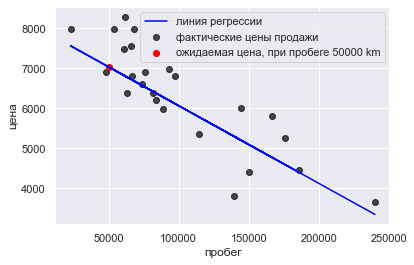

In [24]:
print("Введите пробег по которому нужно оценить цену, в диапазоне", df.km.min(), "-", df.km.max(), ":")

user_input = input()

if (False == user_input.isdigit()):
    
    print("Пожалуйста, введите положительное значение пробега машины.")

else:
        
    user_input = int(user_input)
    
    result_price_by_model =  intercept + slope * user_input
    
    print("Ожидаемое значение цены для данного пробега:", result_price_by_model)
    
    plt.scatter(X, y, color='black', alpha=0.7, label='фактические цены продажи')
    plt.plot(X, [estimate_price for estimate_price in intercept + slope * X], color='blue', label='линия регрессии')
    plt.scatter([user_input], [result_price_by_model], color='red', alpha=1,
                label='ожидаемая цена, при пробеге ' + str(user_input) + ' km')

    plt.xlabel("пробег")
    plt.ylabel("цена")
    plt.legend(loc='upper right')
    plt.show()

## Используем другие подходы нахождения регрессии

### решим напрямую

Простой подход - попытаться решить проблему регрессии напрямую. То есть, учитывая X, каков набор коэффициентов b, который при умножении на X даст y. Нормальные уравнения определяют, как вычислять b напрямую.

```
b = (X^T . X)^-1 . X^T . y
```

Это можно вычислить непосредственно в NumPy, используя функцию inv () для вычисления обратной матрицы.

```python:
b = inv(X.T.dot(X)).dot(X.T).dot(y)
```

После того как коэффициенты рассчитаны, мы можем использовать их для прогнозирования результатов с учетом X.

```python:
yhat = X.dot(b)
```

In [25]:
X, y

(array([240000, 139800, 150500, 185530, 176000, 114800, 166800,  89000,
        144500,  84000,  82029,  63060,  74000,  97500,  67000,  76025,
         48235,  93000,  60949,  65674,  54000,  68500,  22899,  61789]),
 array([3650, 3800, 4400, 4450, 5250, 5350, 5800, 5990, 5999, 6200, 6390,
        6390, 6600, 6800, 6800, 6900, 6900, 6990, 7490, 7555, 7990, 7990,
        7990, 8290]))

In [26]:
# получим матрицу для X
X_dir = np.concatenate(
    (np.ones((len(X_norm), 1)),
    df.km.values.reshape((-1, 1))),
    axis=1
)

X_dir

array([[1.0000e+00, 2.4000e+05],
       [1.0000e+00, 1.3980e+05],
       [1.0000e+00, 1.5050e+05],
       [1.0000e+00, 1.8553e+05],
       [1.0000e+00, 1.7600e+05],
       [1.0000e+00, 1.1480e+05],
       [1.0000e+00, 1.6680e+05],
       [1.0000e+00, 8.9000e+04],
       [1.0000e+00, 1.4450e+05],
       [1.0000e+00, 8.4000e+04],
       [1.0000e+00, 8.2029e+04],
       [1.0000e+00, 6.3060e+04],
       [1.0000e+00, 7.4000e+04],
       [1.0000e+00, 9.7500e+04],
       [1.0000e+00, 6.7000e+04],
       [1.0000e+00, 7.6025e+04],
       [1.0000e+00, 4.8235e+04],
       [1.0000e+00, 9.3000e+04],
       [1.0000e+00, 6.0949e+04],
       [1.0000e+00, 6.5674e+04],
       [1.0000e+00, 5.4000e+04],
       [1.0000e+00, 6.8500e+04],
       [1.0000e+00, 2.2899e+04],
       [1.0000e+00, 6.1789e+04]])

In [27]:
Y_dir = df.price

Y_dir = Y_dir.values.reshape(-1, 1)

Y_dir

array([[3650],
       [3800],
       [4400],
       [4450],
       [5250],
       [5350],
       [5800],
       [5990],
       [5999],
       [6200],
       [6390],
       [6390],
       [6600],
       [6800],
       [6800],
       [6900],
       [6900],
       [6990],
       [7490],
       [7555],
       [7990],
       [7990],
       [7990],
       [8290]])

In [28]:
# транспорируем матрицу и перемножим на первончальную: XT*X
X_dir.T.dot(X_dir)

array([[2.40000000e+01, 2.42559000e+06],
       [2.42559000e+06, 3.08960537e+11]])

In [29]:
# получим обратную матрицу к данному перемножению
from numpy.linalg import inv

inv(X_dir.T.dot(X_dir))

array([[ 2.01728512e-01, -1.58373191e-06],
       [-1.58373191e-06,  1.56702352e-11]])

In [30]:
# перменожим транспорированную X.T и Y
X_dir.T.dot(Y_dir)

array([[1.51964000e+05],
       [1.39896606e+10]])

In [31]:
# перемножим полученные матрицы

inv(X_dir.T.dot(X_dir)).dot(
    X_dir.T.dot(Y_dir)
)

array([[ 8.49959965e+03],
       [-2.14489636e-02]])

In [32]:
# это и есть наши коэффициенты для интерсепта и слоупа - получим данные коэффициенты

dir_result = inv(X_dir.T.dot(X_dir)).dot(
    X_dir.T.dot(Y_dir)
)

intercept_dir = dir_result.tolist()[0][0]
slope_dir = dir_result.tolist()[1][0]

intercept_dir, slope_dir

(8499.599649933218, -0.021448963591702314)

нарисуем нашу линию регрессии с новыми коэффициентами

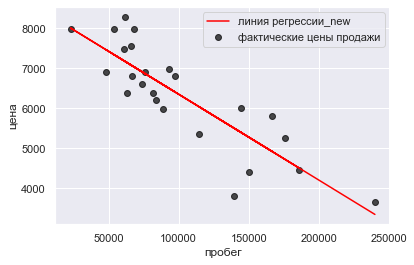

In [33]:
# покажем новое уравнение
plt.scatter(X, y, color='black', alpha=0.7, label='фактические цены продажи')
plt.plot(X, [estimate_price for estimate_price in intercept_dir + slope_dir * X], color='red', label='линия регрессии_new')

plt.xlabel("пробег")
plt.ylabel("цена")
plt.legend(loc='upper right')
plt.show()

### найдем коэффициент детерминации нашей новой модели

In [34]:
# Найдем коэффициент детерминации нашей модели

# прогнозируемые значения переменных
y_hat_new = intercept_dir + slope_dir * X

# SS_res - найдем сумму квадратов остатков регрессии
SS_res_new = sum( (y_hat_new - y)**2 ) / len(y)

# sum_of_square_res (сумма квадратов остатков регрессии):
print("SS_res:",dig_sep(SS_res_new))

# SS_tor - общая сумма квадратов (квадраты отклонений объясняемой переменной от среднего значения)
SS_tot_new = sum( (y - y.mean()) ** 2 ) / len(y)

# sum_of_square_total

print("SS_tot:", dig_sep(SS_tot_new))


print("R^2:", dig_sep(1 - SS_res_new/SS_tot_new))

SS_res: 445 645.245
SS_tot: 1 668 925.222
R^2: 0.733


то есть качество нашей модели (ее объяснительную способность смогли увеличить на 6%)

### пробуем решить пример с двумя регрессорами

In [35]:
Y_acad = np.array(  [20, 35, 30, 45, 60, 69, 75, 90, 105, 110])
X_acad = np.array([ [ 1,  1,  1,  1,  1,  1,  1,  1,   1,   1],
                    [10, 15, 20, 25, 40, 37, 43, 35,  38,  55],
                    [12, 10,  9,  9,  8,  8,  6,  4,   4,   5] ])

Y_acad = Y_acad.reshape(-1, 1)
X_acad = X_acad.T

df_academ = pd.DataFrame({
    "Y": Y_acad.T.tolist()[0],
    "X1": X_acad.T[1:2].tolist()[0],
    "X2": X_acad.T[2:3].tolist()[0]
})


df_academ

Y  X1  X2
0   20  10  12
1   35  15  10
2   30  20   9
3   45  25   9
4   60  40   8
5   69  37   8
6   75  43   6
7   90  35   4
8  105  38   4
9  110  55   5

In [36]:
Y_acad, X_acad

(array([[ 20],
        [ 35],
        [ 30],
        [ 45],
        [ 60],
        [ 69],
        [ 75],
        [ 90],
        [105],
        [110]]),
 array([[ 1, 10, 12],
        [ 1, 15, 10],
        [ 1, 20,  9],
        [ 1, 25,  9],
        [ 1, 40,  8],
        [ 1, 37,  8],
        [ 1, 43,  6],
        [ 1, 35,  4],
        [ 1, 38,  4],
        [ 1, 55,  5]]))

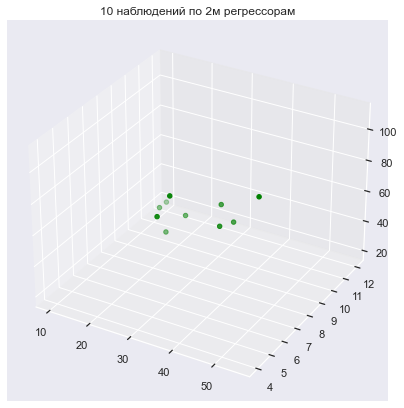

In [37]:
# визуализируем целевую переменную относительно двух регрессоров:

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X_acad.T[1:2], X_acad.T[2:3], Y_acad.T, color = "green")
plt.title("10 наблюдений по 2м регрессорам")
plt.show()

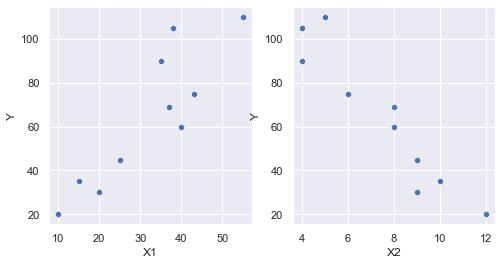

In [38]:
# для большей наглядности покажем зависимость целевой переменной от каждого из факторов:

f, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(data=df_academ, x="X1", y="Y", ax=axs[0])
sns.scatterplot(data=df_academ, x="X2", y="Y", ax=axs[1])
# f.tight_layout()
plt.show()

видим что Y прямо завивист от X1 и обратно зависит от X2

### найдем коэфициенты модели с двумя регрессорами

In [39]:
# получим результат перемножения матриц данной и транпорированной к ней 
X_acad.T.dot(X_acad)

array([[   10,   318,    75],
       [  318, 11862,  2116],
       [   75,  2116,   627]])

In [40]:
# получим обратную матрицу к данному результату:
inv(X_acad.T.dot(X_acad))

array([[ 7.31081648e+00, -1.00488537e-01, -5.35370799e-01],
       [-1.00488537e-01,  1.59305674e-03,  6.64391107e-03],
       [-5.35370799e-01,  6.64391107e-03,  4.32125903e-02]])

In [41]:
# найдем произведение транспорированной матрицы X и Y
X_acad.T.dot(Y_acad)

array([[  639],
       [23818],
       [ 4077]])

In [42]:
# найдем произвдедение этих матриц
inv(X_acad.T.dot(X_acad)).dot(X_acad.T.dot(Y_acad))

array([[95.46900084],
       [ 0.81847551],
       [-7.67953626]])

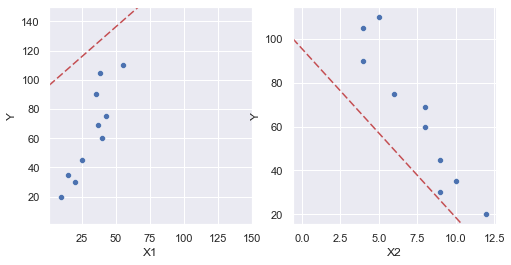

In [43]:
# это и будут наши коэффициенты в уравнении 
# покажем их на графике

f, axs = plt.subplots(1, 2, figsize=(8, 4))

ax_0 = sns.scatterplot(data=df_academ, x="X1", y="Y", ax=axs[0])
ax_0.axline(xy1=(0, 95.46900084), slope=0.81847551, color="r", dashes=(5, 2))
ax_0.set_xlim(1,150)
ax_0.set_ylim(1,150)

ax_1 = sns.scatterplot(data=df_academ, x="X2", y="Y", ax=axs[1])
ax_1.axline(xy1=(0, 95.46900084), slope=-7.67953626, color="r", dashes=(5, 2))

plt.show()

In [44]:
# Найдем коэффициент детерминации нашей модели

# прогнозируемые значения переменных
Y_acad_hat = 95.46900084 + 0.81847551 * df_academ.X1 + -7.67953626 * df_academ.X2

# SS_res - найдем сумму квадратов остатков регрессии

# посчитаем сумму квадратов остатков регресси
SS_res_acad = sum( (Y_acad_hat - df_academ.Y)**2 ) / len(df_academ)

# sum_of_square_res (сумма квадратов остатков регрессии):
dig_sep(SS_res_acad)

'57.133'

In [45]:
# SS_tor - общая сумма квадратов (квадраты отклонений объясняемой переменной от среднего значения)
SS_tot_acad = sum( (df_academ.Y - df_academ.Y.mean()) ** 2 ) / len(df_academ)

# sum_of_square_total
dig_sep(SS_tot_acad)

'892.890'

In [46]:
1 - SS_res_acad/SS_tot_acad

0.9360135985879148

то есть наша модель (и найденные коффициенты объясняют 94% дисперсии в данных)

### общий подход к нахождению коэффициентов через матрицы

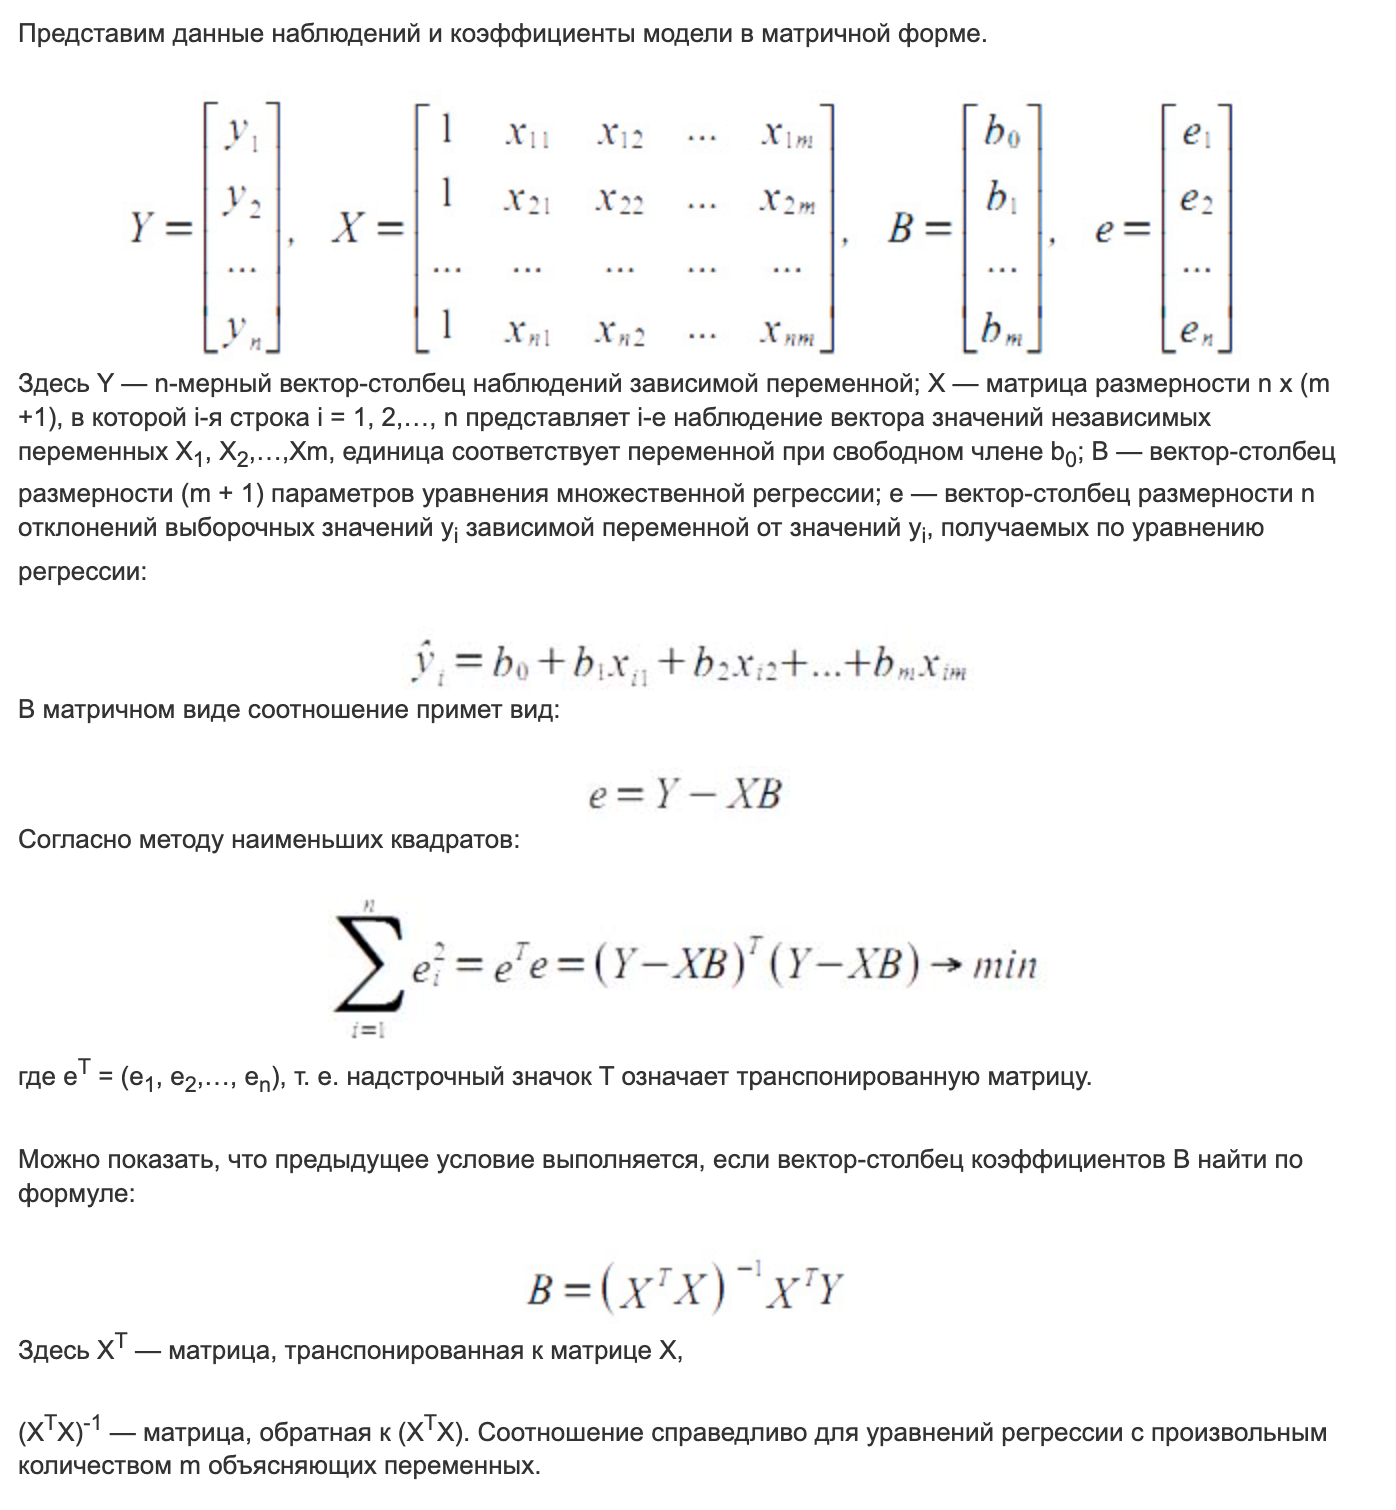

## Решаем с помощью библиотеки sklearn

### загружаем библиотеки

In [47]:
import sklearn
from sklearn.linear_model import LinearRegression

### загружаем выборку для обучения

In [48]:
df_skl = pd.read_csv('data.csv')
df_skl.head()

km  price
0  240000   3650
1  139800   3800
2  150500   4400
3  185530   4450
4  176000   5250

In [49]:
# подготовим объясняющую перменную (в данном случае модель от одной переменной)
X_skl = df_skl.km.values.reshape(-1, 1)
X_skl

array([[240000],
       [139800],
       [150500],
       [185530],
       [176000],
       [114800],
       [166800],
       [ 89000],
       [144500],
       [ 84000],
       [ 82029],
       [ 63060],
       [ 74000],
       [ 97500],
       [ 67000],
       [ 76025],
       [ 48235],
       [ 93000],
       [ 60949],
       [ 65674],
       [ 54000],
       [ 68500],
       [ 22899],
       [ 61789]])

In [50]:
# загружаем целевую переменную
y_skl = df_skl.price
y_skl

0     3650
1     3800
2     4400
3     4450
4     5250
5     5350
6     5800
7     5990
8     5999
9     6200
10    6390
11    6390
12    6600
13    6800
14    6800
15    6900
16    6900
17    6990
18    7490
19    7555
20    7990
21    7990
22    7990
23    8290
Name: price, dtype: int64

### обучаем модель линейной регрессии

In [51]:
model = LinearRegression().fit(X_skl, y_skl)

In [52]:
# получаем массив целевой переменной, построенной на уровнении регрессии от одной переменной
y_skl_pred = model.predict(X_skl)
y_skl_pred

array([3351.84838792, 5501.03453981, 5271.53062938, 4520.17343476,
       4724.58205779, 6037.25862961, 4921.91252284, 6590.64189027,
       5400.22441093, 6697.88670823, 6740.16261547, 7147.02800584,
       6912.37634415, 6408.32569974, 7062.51908929, 6868.94219287,
       7465.00889109, 6504.8460359 , 7192.30676798, 7090.96041501,
       7341.35561598, 7030.3456439 , 8008.43983265, 7174.28963857])

In [53]:
# получим коэффициенты модели - интерсепт и слоуп
print("intersept:", model.intercept_, "slope:", model.coef_)

intersept: 8499.599649933216 slope: [-0.02144896]


In [54]:
# найдем коэффициент детерминации - R^2
model.score(X_skl, y_skl)

0.7329747078314965

In [55]:
# Найдем коэффициент детерминации вручную

# SS_res - найдем сумму квадратов остатков регрессии
SS_res_skl = sum( (y_skl_pred - y)**2 ) / len(y)

# sum_of_square_res (сумма квадратов остатков регрессии):
print("SS_res_skl:", dig_sep(SS_res_skl))

# SS_tor - общая сумма квадратов (квадраты отклонений объясняемой переменной от среднего значения)
SS_tot_skl = sum( (y - y.mean()) ** 2 ) / len(y)

# sum_of_square_total

print("SS_tot_skl:", dig_sep(SS_tot_skl))


print("R^2_skl:", 1 - SS_res_skl/SS_tot_skl)

SS_res_skl: 445 645.245
SS_tot_skl: 1 668 925.222
R^2_skl: 0.7329747078314965


график функции будет выглядит аналогичным образом как в случае решения, найденного через матрицы самостоятельно